In [16]:
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np 
import datetime
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , RobustScaler, MaxAbsScaler,MinMaxScaler,OneHotEncoder, LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,StratifiedKFold,train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
# from mlxtend.feature_selection import SequentialFeatureSelector
# from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
sklearn.set_config(display = 'diagram')
np.random.seed(seed = 42)

In [17]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')

In [18]:
df = pd.read_csv('turbo.csv')
df.head()

,Satici,Avtosalon,Telefonlar,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Hansı bazar üçün yığılıb,Yeniləndi,Baxışların sayı,Extra,Etrafli,Url,Sahiblər,Yerlərin sayı,Qəzalı
0,Autolux Azerbaijan - Jaguar,1,(055) 983-09-83,57800,USD,Bakı,Jaguar,XF,2019,Sedan,Qara,2.0 L/250 a.g./Benzin,0 km,Avtomat,Arxa,Bəli,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,16.08.2023,184447,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Jaguar-ın Azərbaycanda Rəsmi İdxalçı...,https://turbo.az/autos/3175342-jaguar-xf,NaN,NaN,NaN
1,"Avtosalon ""BRABUS and STARTECH Baku""",1,(050) 620-66-66 && (050) 733-85-55 && (012) 43...,38000,USD,Bakı,Toyota,Camry,2020,Sedan,Qara,2.5 L/181 a.g./Benzin,0 km,Avtomat,Ön,Bəli,NaN,NaN,28.07.2023,74383,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...","Toyota CAMRY indi 42.000 $ YOX, 39.900 $ ! Ko...",https://turbo.az/autos/4854528-toyota-camry,NaN,NaN,NaN
2,"Avtosalon ""039 Cars Sumqayıt""",1,(050) 399-00-39 && (055) 388-10-39 && (070) 38...,12800,AZN,Sumqayıt,Baic,A1,2014,Sedan,Yaş Asfalt,1.5 L/115 a.g./Benzin,103 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,20.08.2023,30835,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Xodovoy ve elektron sisteminde hec bir prablem...,https://turbo.az/autos/4693351-baic-a1,NaN,NaN,NaN
3,Əli,0,(099) 799-00-89,26000,USD,Bakı,Porsche,Panamera 4,2013,Liftbek,Göy,3.6 L/300 a.g./Benzin,160 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,20.08.2023,14762,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...","Xarice kocle elaqeder ucuz satilir ,problemli ...",https://turbo.az/autos/5119042-porsche-panamera-4,NaN,NaN,NaN
4,Faxri,0,(050) 555-95-88,26500,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,104 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,19.08.2023,2957,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin original AMG zavodunun ehtiyat hisseleri...,https://turbo.az/autos/4882282-mercedes-s-500,NaN,NaN,NaN


In [19]:
df=df.drop_duplicates()

In [20]:
df.columns = df.columns.str.replace(pat = ' ', repl = '_')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.head()

,satici,avtosalon,telefonlar,qiymet,valyuta,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik,yürüş,sürətlər_qutusu,ötürücü,yeni,vəziyyəti,hansı_bazar_üçün_yığılıb,yeniləndi,baxışların_sayı,extra,etrafli,url,sahiblər,yerlərin_sayı,qəzalı
0,Autolux Azerbaijan - Jaguar,1,(055) 983-09-83,57800,USD,Bakı,Jaguar,XF,2019,Sedan,Qara,2.0 L/250 a.g./Benzin,0 km,Avtomat,Arxa,Bəli,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,16.08.2023,184447,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Jaguar-ın Azərbaycanda Rəsmi İdxalçı...,https://turbo.az/autos/3175342-jaguar-xf,NaN,NaN,NaN
1,"Avtosalon ""BRABUS and STARTECH Baku""",1,(050) 620-66-66 && (050) 733-85-55 && (012) 43...,38000,USD,Bakı,Toyota,Camry,2020,Sedan,Qara,2.5 L/181 a.g./Benzin,0 km,Avtomat,Ön,Bəli,NaN,NaN,28.07.2023,74383,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...","Toyota CAMRY indi 42.000 $ YOX, 39.900 $ ! Ko...",https://turbo.az/autos/4854528-toyota-camry,NaN,NaN,NaN
2,"Avtosalon ""039 Cars Sumqayıt""",1,(050) 399-00-39 && (055) 388-10-39 && (070) 38...,12800,AZN,Sumqayıt,Baic,A1,2014,Sedan,Yaş Asfalt,1.5 L/115 a.g./Benzin,103 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,20.08.2023,30835,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Xodovoy ve elektron sisteminde hec bir prablem...,https://turbo.az/autos/4693351-baic-a1,NaN,NaN,NaN
3,Əli,0,(099) 799-00-89,26000,USD,Bakı,Porsche,Panamera 4,2013,Liftbek,Göy,3.6 L/300 a.g./Benzin,160 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,20.08.2023,14762,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...","Xarice kocle elaqeder ucuz satilir ,problemli ...",https://turbo.az/autos/5119042-porsche-panamera-4,NaN,NaN,NaN
4,Faxri,0,(050) 555-95-88,26500,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,104 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,19.08.2023,2957,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin original AMG zavodunun ehtiyat hisseleri...,https://turbo.az/autos/4882282-mercedes-s-500,NaN,NaN,NaN


In [21]:
df = df.drop(columns= ['satici','telefonlar','yeniləndi','baxışların_sayı','url','sahiblər','qəzalı','etrafli','yerlərin_sayı'])

In [22]:
df=df.loc[df['qiymet']>1000]
df.head()

,avtosalon,qiymet,valyuta,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik,yürüş,sürətlər_qutusu,ötürücü,yeni,vəziyyəti,hansı_bazar_üçün_yığılıb,extra
0,1,57800,USD,Bakı,Jaguar,XF,2019,Sedan,Qara,2.0 L/250 a.g./Benzin,0 km,Avtomat,Arxa,Bəli,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso..."
1,1,38000,USD,Bakı,Toyota,Camry,2020,Sedan,Qara,2.5 L/181 a.g./Benzin,0 km,Avtomat,Ön,Bəli,NaN,NaN,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso..."
2,1,12800,AZN,Sumqayıt,Baic,A1,2014,Sedan,Yaş Asfalt,1.5 L/115 a.g./Benzin,103 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso..."
3,0,26000,USD,Bakı,Porsche,Panamera 4,2013,Liftbek,Göy,3.6 L/300 a.g./Benzin,160 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso..."
4,0,26500,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,104 000 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",NaN,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso..."


In [23]:
def convert_currency(df = None):
    azn_index = df.loc[df.valyuta =='AZN'].index
    euro_index = df.loc[df.valyuta == 'EUR'].index
    usd_index = df.loc[df.valyuta == 'USD'].index
    
    euro_to_azn = df.loc[df.index.isin(values = euro_index), 'qiymet'].astype(dtype = 'float') * 1.81
    usd_to_azn = df.loc[df.index.isin(values = usd_index), 'qiymet'].astype(dtype = 'float') * 1.7
    azn = df.loc[df.index.isin(values = azn_index), 'qiymet'].astype(dtype = 'float')
    
    df.loc[df.index.isin(values = euro_index), 'qiymet'] = euro_to_azn
    df.loc[df.index.isin(values = usd_index), 'qiymet'] = usd_to_azn
    df.loc[df.index.isin(values = azn_index), 'qiymet'] = azn
    
    df.qiymet = df.qiymet.apply(func = lambda x: int(x))
    df.drop(columns = 'valyuta', inplace = True)
    return df

In [24]:
def create_new_columns(df = None):
    df['mühərrik_hecmi'] = df.mühərrik.apply(lambda x: x.split('/')[0])
    df['mühərrik_gucu'] = df.mühərrik.apply(lambda x: x.split('/')[1])
    df['yanacaq_novu'] = df.mühərrik.apply(lambda x: x.split('/')[2])
    df['vuruğu_var'] = df.vəziyyəti.apply(lambda x: x.split(',')[0] if pd.notna(x) else np.nan)
    df['rənglənib'] = df.vəziyyəti.apply(lambda x: x.split(',')[1] if pd.notna(x) else np.nan)
    df['lehimli_disk'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Yüngül lehimli disklər' in x else 'no')
    df['abs_'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'ABS' in x else 'no')
    df['lyuk'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Lyuk' in x else 'no')
    df['yağış_sensoru'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Yağış sensoru' in x else 'no')
    df['mərkəzi_qapanma'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Mərkəzi qapanma' in x else 'no')
    df['park_radarı'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Park radarı' in x else 'no')
    df['kondisioner'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Kondisioner' in x else 'no')
    df['oturacaqların_isidilməsi'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Oturacaqların isidilməsi' in x else 'no')
    df['dəri_salon'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Dəri salon' in x else 'no')
    df['ksenon_lampalar'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Ksenon lampalar' in x else 'no')
    df['arxa_görüntü_kamerası'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Arxa görüntü kamerası' in x else 'no')
    df['yan_pərdələr'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Yan pərdələr' in x else 'no')
    df['oturacaqların_ventilyasiyası'] = df.extra.apply(lambda x: np.nan if pd.isna(x) else 'yes' if 'Oturacaqların ventilyasiyası' in x else 'no')

    df.drop(columns = ['mühərrik','vəziyyəti','extra'], inplace = True)
    return df

In [25]:
def convert_int(df = None):
    df.mühərrik_hecmi = df.mühərrik_hecmi.str.replace(pat = 'L', repl = '')
    df.mühərrik_gucu = df.mühərrik_gucu.str.replace(pat = 'a.g.', repl = '')
    df.yürüş = df.yürüş.str.replace(pat = 'km', repl = '')
    df.yürüş = df.yürüş.str.replace(pat = ' ', repl = '')
    df.mühərrik_hecmi = pd.to_numeric(arg = df.mühərrik_hecmi, downcast = 'float')
    df[['mühərrik_gucu', 'yürüş']] = df[['mühərrik_gucu', 'yürüş']].applymap(func = lambda x: int(x))
    return df

In [26]:
def convert_str(df = None):
    df.avtosalon = df.avtosalon.apply(lambda x: 'yes' if x==1 else 'no')
    return df

In [27]:
def convert_lower_case(df = None):
    df_obj = df.select_dtypes(include = 'object') 
    df[df_obj.columns] = df_obj.applymap(lambda x: np.nan if pd.isna(x) else x.lower())
    return df

In [28]:
def replace_value(df=None):
    df['yeni'] =  df['yeni'].str.strip().replace({'bəli': 'yes', 'xeyr': 'no'})
    return df

In [29]:
df = df.pipe(func = convert_currency).pipe(func = create_new_columns).pipe(func = convert_int).pipe(func = convert_str).pipe(func = convert_lower_case).pipe(func = replace_value)
df.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs_,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,yes,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,yes,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
1,yes,64600,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,yes,NaN,2.5,181,benzin,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,no,no
2,yes,12800,sumqayıt,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,no,NaN,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,yes,yes,yes,yes,yes,yes,yes,no,no,no,no,yes,no
3,no,44200,bakı,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,no,NaN,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
4,no,45050,bakı,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,no,NaN,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


In [30]:
df.hansı_bazar_üçün_yığılıb.isna().sum()

2862

In [31]:
df.describe()

,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
count,9279.000000,9279.000000,9.279000e+03,9279.000000,9279.000000
mean,41523.624852,2011.241082,1.641794e+05,2.311585,190.594030
std,51700.774429,8.550231,1.711254e+05,1.368276,103.193119
min,1100.000000,1952.000000,0.000000e+00,0.000000,3.000000
25%,13800.000000,2007.000000,5.620600e+04,1.600000,120.000000
50%,25900.000000,2013.000000,1.520000e+05,2.000000,170.000000
75%,48940.000000,2017.000000,2.269330e+05,2.500000,240.000000
max,659600.000000,2023.000000,5.555555e+06,16.000000,1707.000000


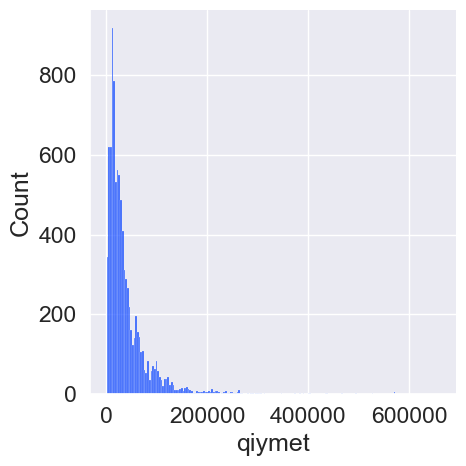

In [32]:
sns.displot(data=df['qiymet'])
plt.show()

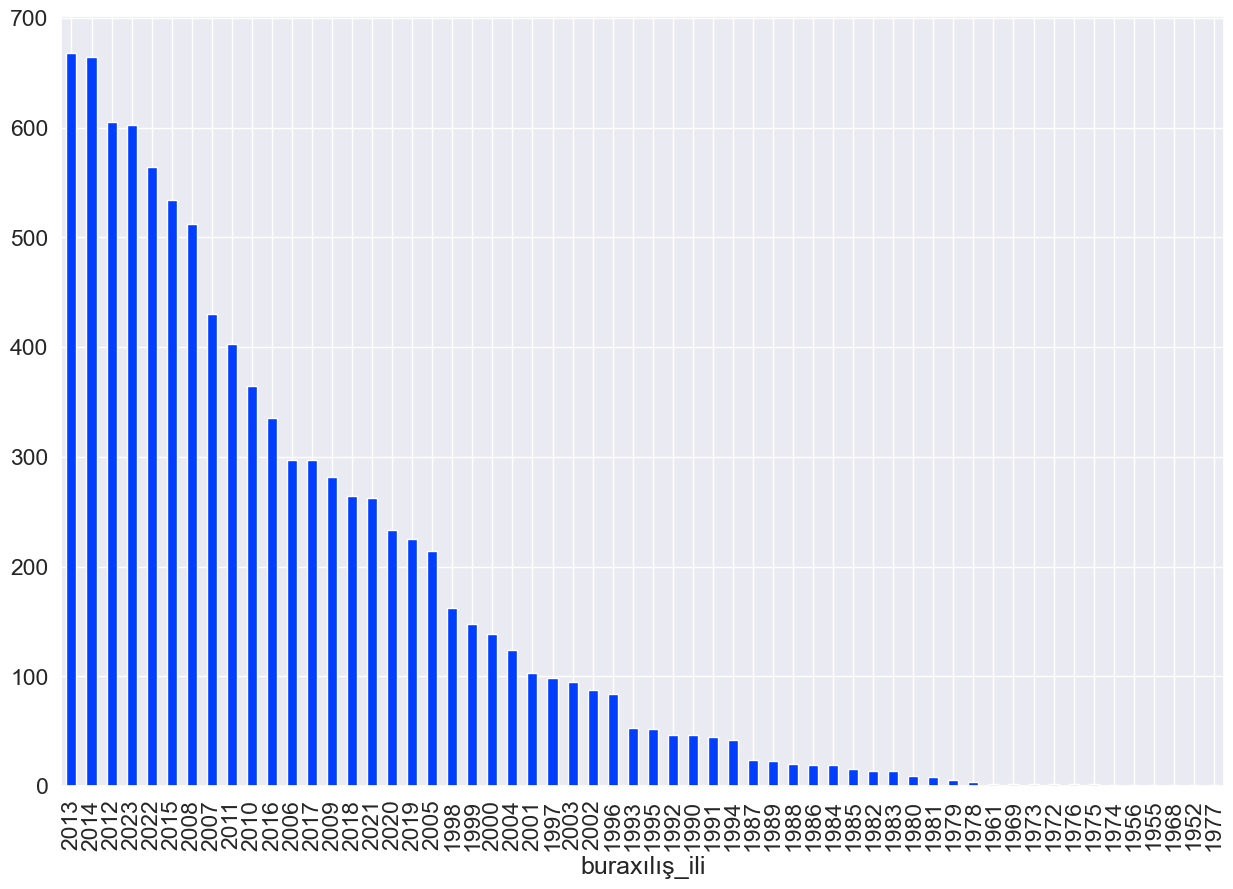

In [33]:
#en yeni masinin 10 yasi var
plt.figure(figsize=(15,10))
df['buraxılış_ili'].value_counts().plot.bar()
plt.show()

In [34]:
plt.figure(figsize = (6,4))
sns.heatmap(data = df.drop(columns = 'qiymet').corr(), cmap = plt.cm.coolwarm, annot = True, fmt = '.0%')
plt.title(label = 'Correlation between independent variables', fontsize = 15)
plt.xlabel(xlabel = 'Features', fontsize = 15)
plt.ylabel(ylabel = 'Features', fontsize = 15)
plt.yticks(rotation = 0)
plt.show()

ValueError: could not convert string to float: 'yes'

<Figure size 600x400 with 0 Axes>

In [35]:
df=df.sort_values(by='buraxılış_ili')
df=df.reset_index()

In [36]:
df=df.drop(columns=['index'])

In [37]:
df.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs_,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,no,5000,bakı,ural,8.1238 volk,1952,motosiklet,mavi,9,mexaniki,arxa,yes,avropa,0.0,36,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,no,16500,zaqatala,gaz,m-20 pobeda,1955,sedan,yaşıl,36000,mexaniki,arxa,no,rusiya,2.5,75,benzin,vuruğu yoxdur,rənglənməyib,yes,no,no,no,no,no,no,no,yes,no,no,no,no
2,no,39500,bakı,gaz,12 зим,1956,sedan,qara,20000,mexaniki,arxa,no,NaN,2.4,100,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,no,3000,bakı,gaz,m-21,1961,sedan,ağ,250000,mexaniki,arxa,no,NaN,2.4,100,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,no,20500,bakı,gaz,m-21,1961,sedan,qara,53000,mexaniki,arxa,no,rusiya,2.4,75,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
moto_nan_list=df[df['ban_növü']=='motosiklet'].iloc[:,19:31].drop(columns=['dəri_salon','abs_']).columns.tolist()

In [39]:
def motosikle_change_nan(data_frame=None):
    for i in moto_nan_list:
        data_frame[i].fillna('no' , inplace=True)
    return data_frame
motosikle_change_nan(data_frame=df).head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs_,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,no,5000,bakı,ural,8.1238 volk,1952,motosiklet,mavi,9,mexaniki,arxa,yes,avropa,0.0,36,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,no,no,no,no,no,no,NaN,no,no,no,no
1,no,16500,zaqatala,gaz,m-20 pobeda,1955,sedan,yaşıl,36000,mexaniki,arxa,no,rusiya,2.5,75,benzin,vuruğu yoxdur,rənglənməyib,yes,no,no,no,no,no,no,no,yes,no,no,no,no
2,no,39500,bakı,gaz,12 зим,1956,sedan,qara,20000,mexaniki,arxa,no,NaN,2.4,100,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,no,no,no,no,no,no,NaN,no,no,no,no
3,no,3000,bakı,gaz,m-21,1961,sedan,ağ,250000,mexaniki,arxa,no,NaN,2.4,100,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,no,no,no,no,no,no,NaN,no,no,no,no
4,no,20500,bakı,gaz,m-21,1961,sedan,qara,53000,mexaniki,arxa,no,rusiya,2.4,75,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,no,no,no,no,no,no,NaN,no,no,no,no


In [40]:
def apply_imputer(data_frame=None):
    categoric_data = data_frame.select_dtypes(include='object')
    for i in categoric_data.columns:
        categoric_data[i] = SimpleImputer(strategy='most_frequent').fit_transform(categoric_data[i].to_frame())
    return categoric_data

In [41]:
categoric_data = apply_imputer(data_frame=df)
categoric_data

ValueError: 2

In [1698]:
df.rənglənib.isna().sum()

22

In [1699]:
categoric_data.isnull().sum()

avtosalon                       0
şəhər                           0
marka                           0
model                           0
ban_növü                        0
rəng                            0
sürətlər_qutusu                 0
ötürücü                         0
yeni                            0
hansı_bazar_üçün_yığılıb        0
yanacaq_novu                    0
vuruğu_var                      0
rənglənib                       0
lehimli_disk                    0
abs_                            0
lyuk                            0
yağış_sensoru                   0
mərkəzi_qapanma                 0
park_radarı                     0
kondisioner                     0
oturacaqların_isidilməsi        0
dəri_salon                      0
ksenon_lampalar                 0
arxa_görüntü_kamerası           0
yan_pərdələr                    0
oturacaqların_ventilyasiyası    0
dtype: int64

In [1700]:
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]= lb.fit_transform(data_frame[i])
    return data_frame

In [1701]:
categoric_data = label_encoder_process(categoric_data)

In [1702]:
categoric_data.head()

,avtosalon,şəhər,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs_,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,6,117,125,12,6,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0,55,33,550,17,15,1,0,0,5,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,6,33,6,17,8,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,6,33,551,17,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0
4,0,6,33,551,17,8,1,0,0,5,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0


In [1703]:
df=pd.concat([categoric_data,df.select_dtypes(include='number')] , axis=1)
df.head()

,avtosalon,şəhər,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs_,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,0,6,117,125,12,6,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,5000,1952,9,0.0,36
1,0,55,33,550,17,15,1,0,0,5,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,16500,1955,36000,2.5,75
2,0,6,33,6,17,8,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,39500,1956,20000,2.4,100
3,0,6,33,551,17,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,3000,1961,250000,2.4,100
4,0,6,33,551,17,8,1,0,0,5,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,20500,1961,53000,2.4,75


In [1704]:
df.isna().sum()

avtosalon                       0
şəhər                           0
marka                           0
model                           0
ban_növü                        0
rəng                            0
sürətlər_qutusu                 0
ötürücü                         0
yeni                            0
hansı_bazar_üçün_yığılıb        0
yanacaq_novu                    0
vuruğu_var                      0
rənglənib                       0
lehimli_disk                    0
abs_                            0
lyuk                            0
yağış_sensoru                   0
mərkəzi_qapanma                 0
park_radarı                     0
kondisioner                     0
oturacaqların_isidilməsi        0
dəri_salon                      0
ksenon_lampalar                 0
arxa_görüntü_kamerası           0
yan_pərdələr                    0
oturacaqların_ventilyasiyası    0
qiymet                          0
buraxılış_ili                   0
yürüş                           0
mühərrik_hecmi

In [1705]:
# numeric data da null deyer yoxdur

## Regressor Model

In [1706]:
X = df.drop(columns='qiymet')
Y = df['qiymet']

In [1707]:
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.2,random_state=42)

In [1708]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7423, 30), (1856, 30), (7423,), (1856,))

In [1709]:
def evaluate_model_performance(model=None, train_features=None, train_labels=None, test_features=None, test_labels=None, algorithm_name=None):
    
    mse = mean_squared_error(y_true= test_labels, y_pred= model.predict(X = test_features))
    rmse = mean_squared_error(y_true= test_labels, y_pred= model.predict(X = test_features), squared=False)
    mae = mean_absolute_error(y_true= test_labels, y_pred= model.predict(X = test_features))
    train_r2 = r2_score(y_true = train_labels,y_pred = model.predict(X = train_features))
    test_r2 = r2_score(y_true= test_labels, y_pred= model.predict(X = test_features))

    print(f"Model Performance for: {algorithm_name}\n")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("Train R-squared (R2) Score:", train_r2)
    print('Test R-squared (R2) Score:',test_r2)


In [1710]:
xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)

In [1711]:
model_summary = evaluate_model_performance(model = xgb_model,
                                           train_features = X_train,
                                           train_labels = y_train,
                                           test_features = X_test,
                                           test_labels = y_test,
                                           algorithm_name = 'XGBRegressor')
model_summary

Model Performance for: XGBRegressor

Mean Squared Error (MSE): 113220316.7313819
Root Mean Squared Error (RMSE): 10640.503593880409
Mean Absolute Error (MAE): 4977.99260897472
Train R-squared (R2) Score: 0.9954221434184594
Test R-squared (R2) Score: 0.9527124056566215


In [1712]:
%%time 

rkf = RepeatedStratifiedKFold(random_state = 42)

cross_validation = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, scoring = 'r2',cv = rkf,n_jobs = -1)
max_score = cross_validation[cross_validation.argmax()] 
min_score = cross_validation[cross_validation.argmin()]
average_score = cross_validation.mean()
std_score = cross_validation.std()

print(f'Cross validation summary for the Regressor:\n')
print(f'Standard Deviation: {std_score:.2f}')
print(f'Average R2: {average_score:.2f}')
print(f'Maximum R2: {max_score: .2f}')
print(f'Minimum R2 : {min_score: .2f}')

Cross validation summary for the Regressor:

Standard Deviation: 0.01
Average R2: 0.94
Maximum R2:  0.96
Minimum R2 :  0.92
Wall time: 52.5 s


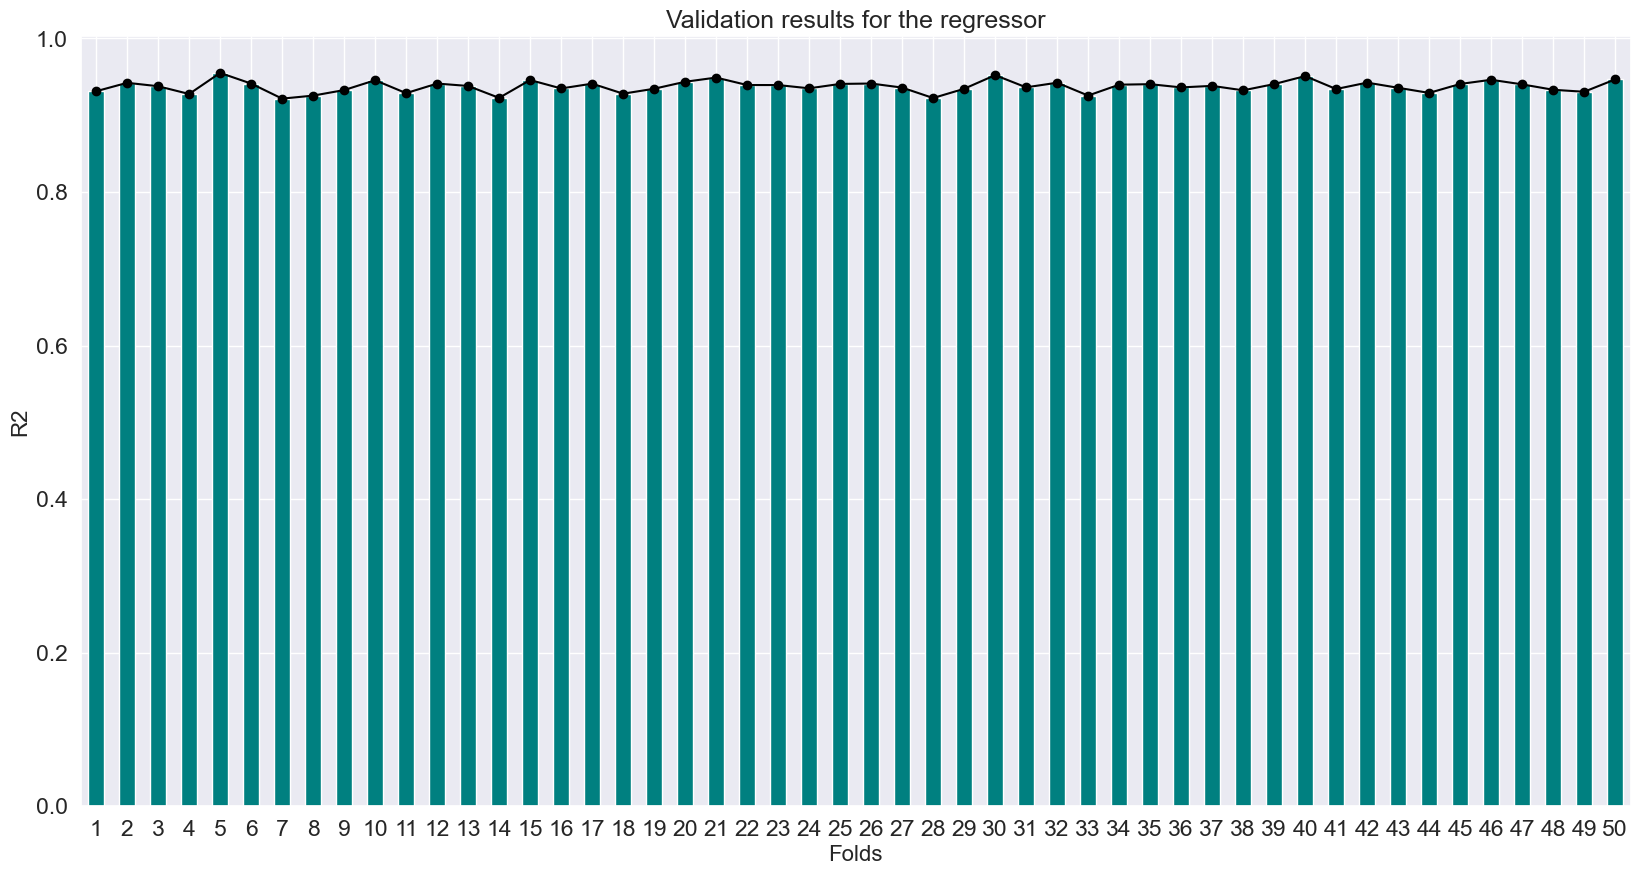

In [1713]:
plt.figure(figsize = (20,10))
plt.plot(cross_validation,marker = 'o',color = 'black')
pd.Series(data = cross_validation).plot(kind = 'bar',color = 'teal')
plt.title(label  = 'Validation results for the regressor')
plt.xlabel(xlabel = 'Folds',fontsize = 16)
plt.ylabel(ylabel = 'R2', fontsize = 16)
plt.xticks(ticks = range(cross_validation.size),labels = range(1,cross_validation.size + 1),rotation = 0)
plt.show()

In [1714]:
with open(file = 'car_model.pickle',mode = 'wb') as pickled_file:
    pickle.dump(obj = xgb_model, file = pickled_file)

In [1715]:
predicted_data=pd.DataFrame(prediction ,columns=['Predicted'])

actual_data=pd.DataFrame(y_test)
actual_data=actual_data.rename(columns={'qiymet':'Actual_value'}).reset_index()['Actual_value']

compare_2_data=pd.concat([predicted_data,actual_data],axis=1)
compare_2_data.head(10)

,Predicted,Actual_value
0,5530.546875,4800
1,18911.720703,19800
2,49772.449219,44030
3,48048.597656,45900
4,4021.874512,3800
5,13950.362305,60000
6,21230.093750,20800
7,39699.019531,39900
8,49386.710938,45900
9,71742.781250,68680
